# I- Importing data from Kaggle

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedsahraoui","key":"8add957046bf6564590d8183883ad314"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d datamunge/sign-language-mnist

 91% 57.0M/62.6M [00:00<00:00, 61.0MB/s]
100% 62.6M/62.6M [00:00<00:00, 85.8MB/s]


In [ ]:
!ls

kaggle.json  sample_data  sign-language-mnist.zip


In [ ]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# II- Data Understanfing

In [ ]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_images = pd.read_csv('./sign_mnist_train.csv')
test_images = pd.read_csv('./sign_mnist_test.csv')

In [ ]:
Y_train = train_images['label'].values
Y_test = test_images['label'].values

X_train = train_images.drop(["label"],axis=1).values
X_test = test_images.drop(["label"],axis=1).values

In [ ]:
a=X_train.shape
b=X_test.shape
c=Y_train.shape
d=Y_test.shape

print('shape of X_train :',a)
print('shape of X_test :',b)
print('shape of Y_train :',c)
print('shape of Y_test :',d)

shape of X_train : (27455, 784)
shape of X_test : (7172, 784)
shape of Y_train : (27455,)
shape of Y_test : (7172,)


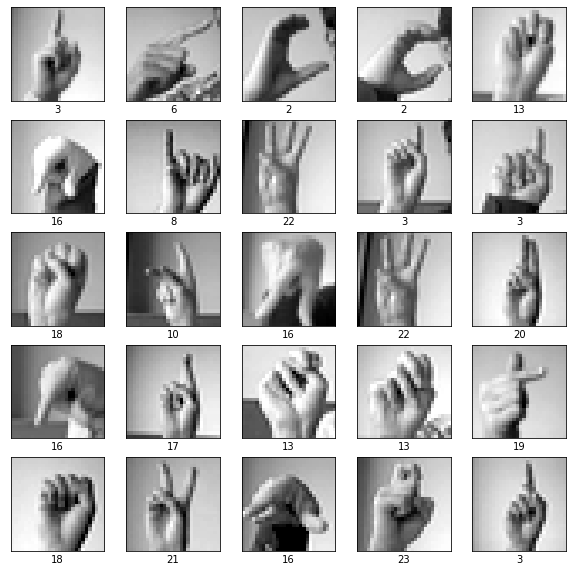

In [ ]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.xlabel(Y_train[i])
plt.show()

# III- Data Preparation:

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train.shape

(27455, 28, 28, 1)

In [ ]:
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)
Y_test = label_binrizer.fit_transform(Y_test)

### Data Augmentation:

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=30, zoom_range=0.2, horizontal_flip = True,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   fill_mode='nearest')

In [ ]:
validation_datagen = ImageDataGenerator()

# IV- Modeling:

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 32 , kernel_size=(3,3), padding = 'same', activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3) , padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides = 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(24, activation = 'softmax'))

In [ ]:
model.compile(optimizer= 'adam' ,loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [ ]:
history = model.fit_generator(train_datagen.flow(X_train, Y_train, batch_size=32),
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(X_test, Y_test, batch_size=32),
                              validation_steps=len(X_test) // 32)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
857/857 [==============================] - 54s 62ms/step - loss: 2.4097 - accuracy: 0.2952 - val_loss: 0.7354 - val_accuracy: 0.7200
Epoch 2/10
857/857 [==============================] - 58s 67ms/step - loss: 0.7832 - accuracy: 0.7322 - val_loss: 1.2460 - val_accuracy: 0.6634
Epoch 3/10
857/857 [==============================] - 54s 63ms/step - loss: 0.4560 - accuracy: 0.8426 - val_loss: 0.1950 - val_accuracy: 0.9325
Epoch 4/10
857/857 [==============================] - 52s 61ms/step - loss: 0.3274 - accuracy: 0.8868 - val_loss: 0.2359 - val_accuracy: 0.9019
Epoch 5/10
857/857 [==============================] - 52s 61ms/step - loss: 0.2768 - accuracy: 0.9070 - val_loss: 0.3809 - val_accuracy: 0.8592
Epoch 6/10
857/857 [==============================] - 52s 61ms/step - loss: 0.2165 - accuracy: 0.9278 - val_loss: 0.0513 - val_accuracy: 0.9819
Epoch 7/10
857/857 [==============================] - 52s 61ms/step - loss: 0.1894 - accuracy: 0.9340 - val_loss: 0.2582 - val_accuracy:

# V- Evaluation:

In [ ]:
model.evaluate(X_test, Y_test, verbose=0)

[0.36903852224349976, 0.901979923248291]

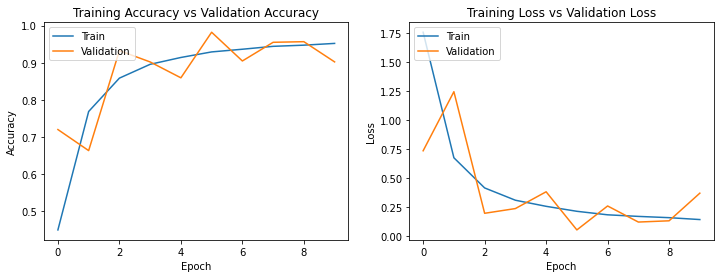

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()